<a href="https://colab.research.google.com/github/gishnum/decisiontree/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('BreastCancer.csv')

In [14]:
df_dum = pd.get_dummies(df, drop_first=True)

print(df_dum.head())

     Code  Clump  UniCell_Size  ...  NoemN  Mitoses  Class_Malignant
0   61634      5             4  ...      3        1                0
1   63375      9             1  ...      7        2                1
2   76389     10             4  ...      1        1                1
3   95719      6            10  ...     10        7                1
4  128059      1             1  ...      1        1                0

[5 rows x 11 columns]


In [0]:
X = df_dum.iloc[:,0:10]
y = df_dum.iloc[:,10]

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2018)

In [0]:
clf = DecisionTreeClassifier(random_state=2018)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


In [18]:
print(confusion_matrix(y_test, y_pred))




[[127   8]
 [  9  66]]


In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       135
           1       0.89      0.88      0.89        75

    accuracy                           0.92       210
   macro avg       0.91      0.91      0.91       210
weighted avg       0.92      0.92      0.92       210



In [20]:
print(accuracy_score(y_test,y_pred))

0.919047619047619


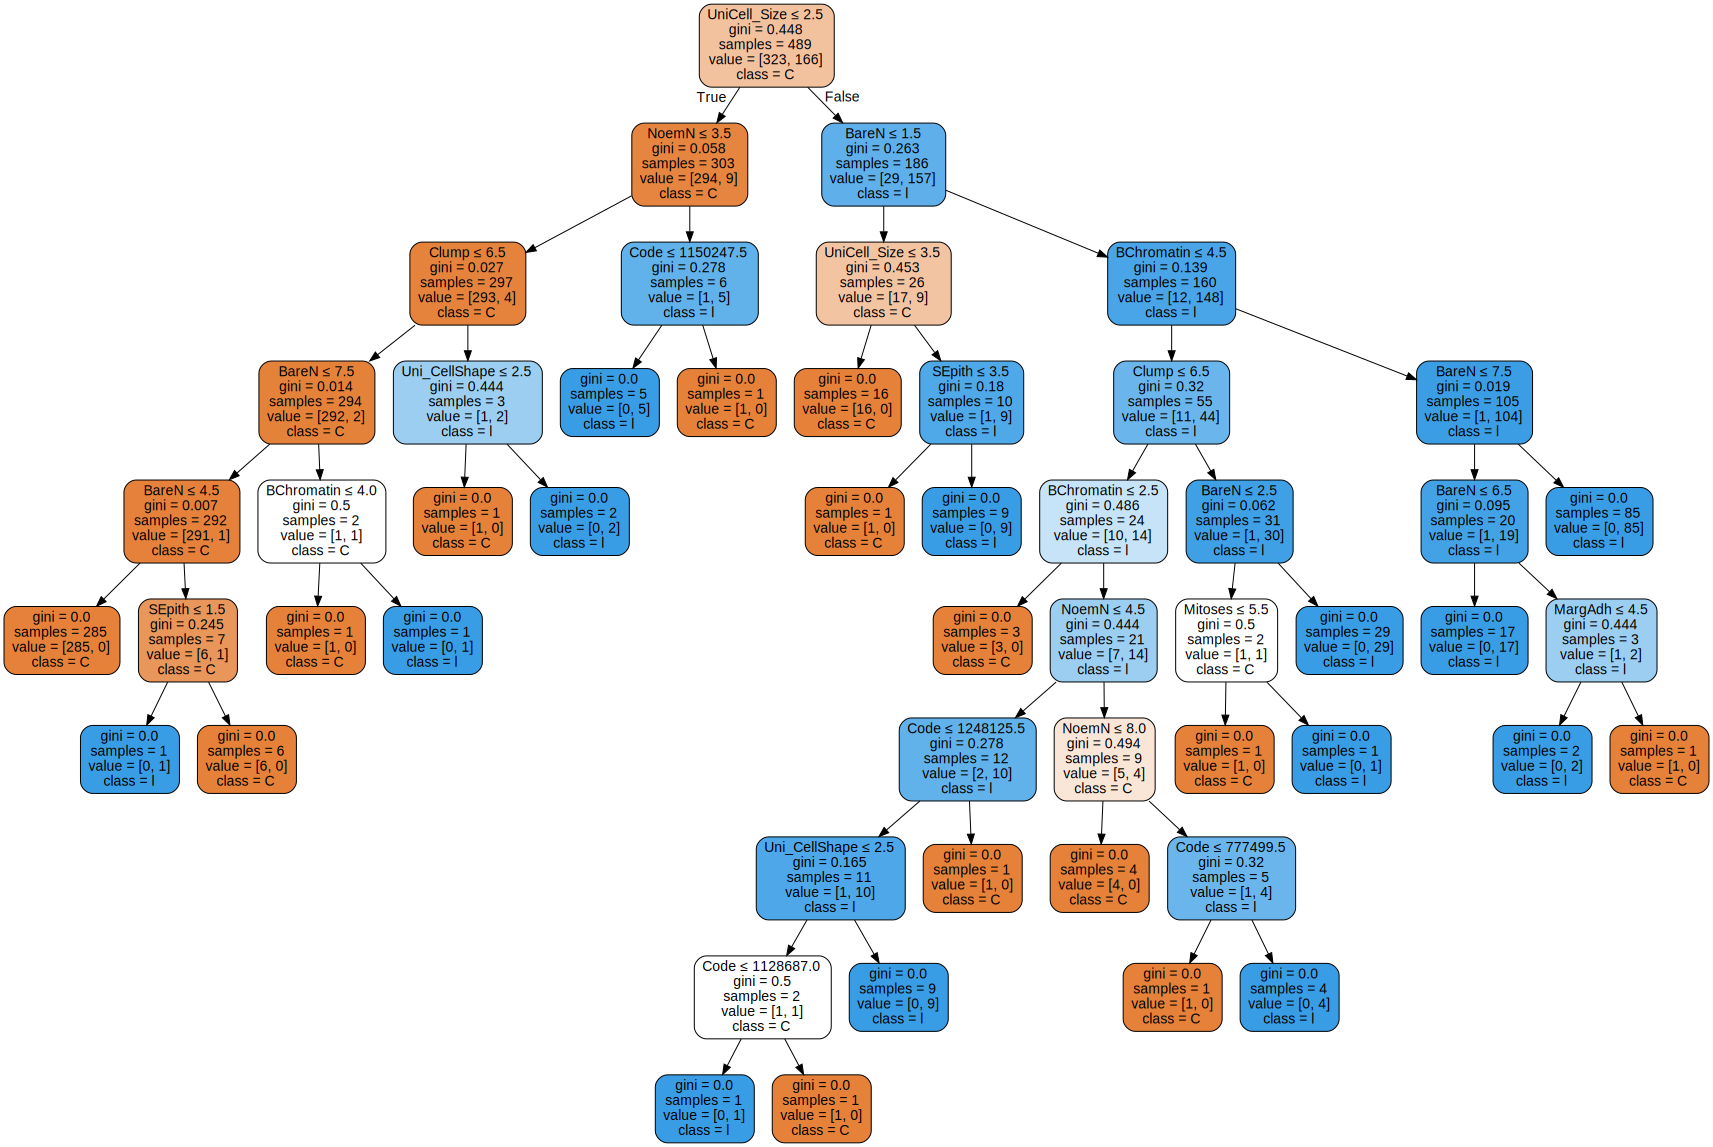

In [21]:
import graphviz 

from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=y_train.name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [22]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=2018)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=5,scoring='roc_auc')

cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=2018,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15],
                 

In [23]:
print(cv.best_params_)



{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 5}


In [24]:
print(cv.best_score_)



0.9737988958292589


In [26]:
best_model = cv.best_estimator_

print(best_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2018, splitter='best')


ValueError: ignored

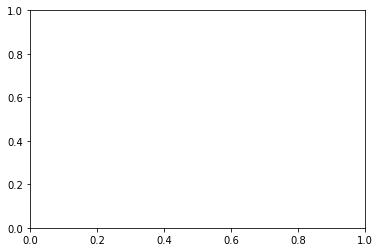

In [27]:
import matplotlib.pyplot as plt

best_model.feature_importances_

ind = np.arange(3)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns))
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()

________________________________________________________________________________________________________________________________________________________________________________
here we are going to use the min_samples_split etc 


In [0]:
clf = DecisionTreeClassifier(max_depth=3,random_state=2018,min_samples_split=20,min_samples_leaf=5)

In [29]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[125  10]
 [  1  74]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       135
           1       0.88      0.99      0.93        75

    accuracy                           0.95       210
   macro avg       0.94      0.96      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


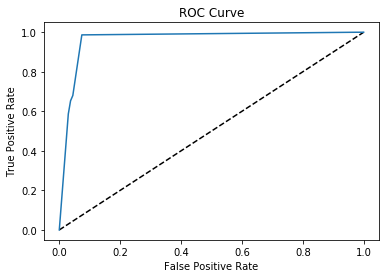

0.9628148148148149

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)


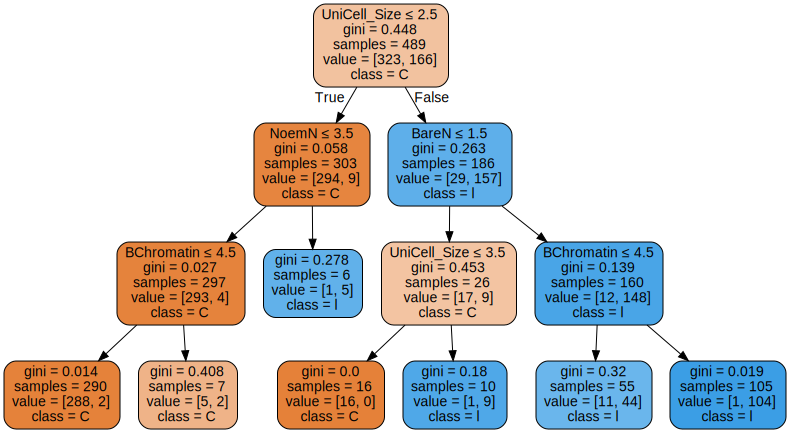

In [33]:
import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph 

from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=y_train.name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 